#  Anomaly Detection for Falls in Elderly People using IoT Sensor Data


---

Achieving a Model Precision of 0.986

## Project Overview

**Problem Statement**:

The analytics department of an elderly care facility wants to implement an effective anomaly detection system to identify instances of falls among their residents. They have deployed IoT sensors in the residents' living spaces to capture movement and activity data. The objective is to develop a robust anomaly detection solution that can accurately detect and alert caregivers about fall events, ensuring timely response and intervention.

**Data Description**:

The dataset available is collected from IoT sensors installed in the rooms of elderly residents. The data includes sensor positions at each sample, labeled **x, y** or **z**.
010-000-024-033, 010-000-030-096, 020-000-032-221 and 020-000-033-111 are one-hot encoded representations of each sensor activity. Four sensors were used during the experiments, which have been fixed to the persons chest, ankles and belt.

The labels represent the falling/normal-living event, **where 0 is normal and 1 is the anomalous event of falling.**

**Data**: [link text](https://www.kaggle.com/datasets/jorekai/anomaly-detection-falling-people-events)


1. **Data Exploration and Preprocessing:**
   - Load and explore the IoT sensor dataset, understanding the available features and their distributions.
   - Perform data preprocessing tasks such as handling missing values, data normalization, and feature engineering.
   - Collect relevant operational data from various sources, including logs, metrics, and events.
   - Perform data cleaning and preprocessing tasks, including handling missing values, data formatting, and standardization.
   - Leverage big data technologies such as Apache Spark to handle the large volume of operational data efficiently.

2. **Model Selection and Training:**
   - Select and compare multiple anomaly detection techniques suitable for the given dataset and problem.
   - Implement the chosen algorithms and train them using the preprocessed data.
   - Evaluate and fine-tune the models using appropriate evaluation metrics, considering the trade-off between precision and recall.
   - Implement anomaly detection models, such as Isolation Forest, One-Class SVM, or other suitable algorithms, to identify anomalies in the operational data.

3. **Utilizing Big Data Technologies:**
   - Leverage Apache Spark or other big data processing frameworks to handle the volume and velocity of the sensor data.

# Installing Packages

**Apache Spark**

In [1]:
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=25643923a81f08f831ff2a6aad65139a666849c57691641aef7a13f208e8cfd4
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!pip install kaggle

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Obtaining Data

**Content**

>As many time series classification tasks are prone to low dimension this data set contains three dimensional parameters. X, Y and Z represent sensor positions at each sample. The timestamps of each measurement were eradicated, as timestamps as feature tend to be principal components for classification tasks. The problem within the use of timestamps is an unbalanced learning task without a broad generalization possibility.

>010-000-024-033, 010-000-030-096, 020-000-032-221 and 020-000-033-111 are one-hot encoded representations of each sensor activity. Four sensors were used during the experiments, which have been fixed to the persons chest, ankles and belt.

>The labels represent the falling/normal-living event, where 0 is normal and 1 is the anomalous event of falling.

>Each .csv file is a distinct person which has been observed during the experiments. 5 test persons are given and 20 training persons.

**Acknowledgements**

The data set is a refactored version of https://archive.ics.uci.edu/ml/datasets/Localization+Data+for+Person+Activity all rights belong to the authors of this data set.

[Source] B. Kaluza, V. Mirchevska, E. Dovgan, M. Lustrek, M. Gams, An Agent-based Approach to Care in Independent Living, International Joint Conference on Ambient Intelligence (AmI-10), Malaga, Spain, In press *italicized text*


In [5]:
!kaggle datasets download -d jorekai/anomaly-detection-falling-people-events

  0% 0.00/4.34M [00:00<?, ?B/s]
100% 4.34M/4.34M [00:00<00:00, 97.5MB/s]


In [6]:
!unzip anomaly-detection-falling-people-events.zip

Archive:  anomaly-detection-falling-people-events.zip
  inflating: data/test/data_20.csv   
  inflating: data/test/data_21.csv   
  inflating: data/test/data_22.csv   
  inflating: data/test/data_23.csv   
  inflating: data/test/data_24.csv   
  inflating: data/train/data_0.csv   
  inflating: data/train/data_1.csv   
  inflating: data/train/data_10.csv  
  inflating: data/train/data_11.csv  
  inflating: data/train/data_12.csv  
  inflating: data/train/data_13.csv  
  inflating: data/train/data_14.csv  
  inflating: data/train/data_15.csv  
  inflating: data/train/data_16.csv  
  inflating: data/train/data_17.csv  
  inflating: data/train/data_18.csv  
  inflating: data/train/data_19.csv  
  inflating: data/train/data_2.csv   
  inflating: data/train/data_3.csv   
  inflating: data/train/data_4.csv   
  inflating: data/train/data_5.csv   
  inflating: data/train/data_6.csv   
  inflating: data/train/data_7.csv   
  inflating: data/train/data_8.csv   
  inflating: data/train/data_9.csv

In [7]:
from pyspark.sql import SparkSession
from functools import reduce

# Create a SparkSession
spark = SparkSession.builder.appName("AnomalyDetection").getOrCreate()

# Define the file paths
test_files = ["data/test/data_20.csv", "data/test/data_21.csv", "data/test/data_22.csv",
              "data/test/data_23.csv", "data/test/data_24.csv"]

train_files = ["data/train/data_0.csv", "data/train/data_1.csv", "data/train/data_2.csv",
               "data/train/data_3.csv", "data/train/data_4.csv", "data/train/data_5.csv",
               "data/train/data_6.csv", "data/train/data_7.csv", "data/train/data_8.csv",
               "data/train/data_9.csv", "data/train/data_10.csv", "data/train/data_11.csv",
               "data/train/data_12.csv", "data/train/data_13.csv", "data/train/data_14.csv",
               "data/train/data_15.csv", "data/train/data_16.csv", "data/train/data_17.csv",
               "data/train/data_18.csv", "data/train/data_19.csv"]

#NOTE:
# Why am I Randomizing Data? Randomizing the data can help eliminate any biases or dependencies that may be present
# when analyzing the data by individual persons. It ensures that the data is representative and reduces the
# potential for overfitting to specific individuals. Randomization can also help to create a more generalized model
# that can be applied to new, unseen individuals.


# Load CSV files into separate DataFrames
test_dfs = [spark.read.csv(file, header=True, inferSchema=True) for file in test_files]
train_dfs = [spark.read.csv(file, header=True, inferSchema=True) for file in train_files]

# Combine DataFrames
test_df = reduce(lambda x, y: x.union(y), test_dfs)
train_df = reduce(lambda x, y: x.union(y), train_dfs)

# Verify the Combined DataFrames
test_df.printSchema()
train_df.printSchema()


root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)
 |-- 010-000-024-033: double (nullable = true)
 |-- 010-000-030-096: double (nullable = true)
 |-- 020-000-032-221: double (nullable = true)
 |-- 020-000-033-111: double (nullable = true)
 |-- anomaly: double (nullable = true)

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)
 |-- 010-000-024-033: double (nullable = true)
 |-- 010-000-030-096: double (nullable = true)
 |-- 020-000-032-221: double (nullable = true)
 |-- 020-000-033-111: double (nullable = true)
 |-- anomaly: double (nullable = true)



# Dataframe Details

In [8]:
test_df.count(), train_df.count()

(30030, 134229)

In [9]:
train_df.show(10)

+------------------+------------------+------------------+---------------+---------------+---------------+---------------+-------+
|                 x|                 y|                 z|010-000-024-033|010-000-030-096|020-000-032-221|020-000-033-111|anomaly|
+------------------+------------------+------------------+---------------+---------------+---------------+---------------+-------+
|18.495859699336677| 13.76652678776089|14.362623811764362|            0.0|            0.0|            0.0|            1.0|    0.0|
|18.501072036621377|13.827225151119427|14.270267567797987|            0.0|            0.0|            1.0|            0.0|    0.0|
|18.405949799991035|13.868976066998284|14.094803990614267|            1.0|            0.0|            0.0|            0.0|    0.0|
| 18.44457156638717|13.910701090731276|14.116078369180716|            0.0|            1.0|            0.0|            0.0|    0.0|
| 18.41847018407317|13.933916893862424|14.320566179943336|            0.0|         

# Data Visuals

## Class Distribution

"If We think from the persepctive of building the model to find out the anomalous data which is not seen very frequently We should go for Anomaly detection technique using Gaussian Distribution"

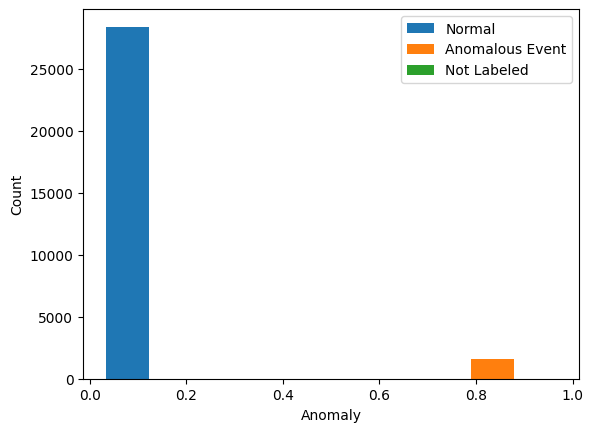

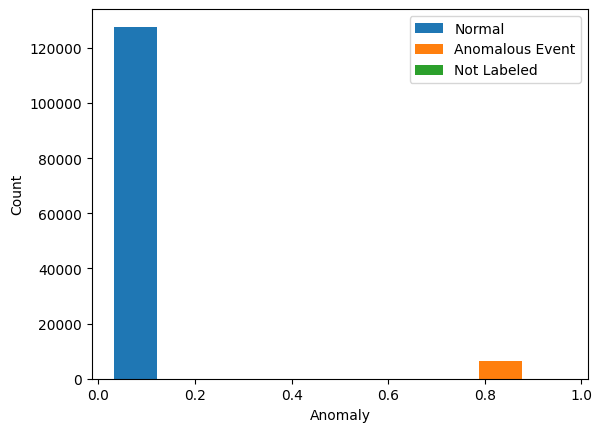

In [ ]:
import matplotlib.pyplot as plt

column_data = test_df.select("anomaly").rdd.flatMap(lambda x: x).collect()

anomaly_data = [data for data in column_data if data == 1.0]
non_anomaly_data = [data for data in column_data if data == 0.0]
unmarked_data = [data for data in column_data if (data != 1.0) and (data != 0.0)]

plt.hist([non_anomaly_data, anomaly_data, unmarked_data], bins=3, label=["Normal", "Anomalous Event", "Not Labeled"])
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.legend()
plt.show()


column_data2 = train_df.select("anomaly").rdd.flatMap(lambda x: x).collect()

anomaly_data2 = [data for data in column_data2 if data == 1.0]
non_anomaly_data2 = [data for data in column_data2 if data == 0.0]
unmarked_data2 = [data for data in column_data2 if (data != 1.0) and (data != 0.0)]

plt.hist([non_anomaly_data2, anomaly_data2, unmarked_data2], bins=3, label=["Normal", "Anomalous Event", "Not Labeled"])
plt.xlabel("Anomaly")
plt.ylabel("Count")
plt.legend()
plt.show()


*Note: Accuracy may be a poor Evaludation Metric as there appears to be a large class imbalance.*

## Feature Correlation Matrix

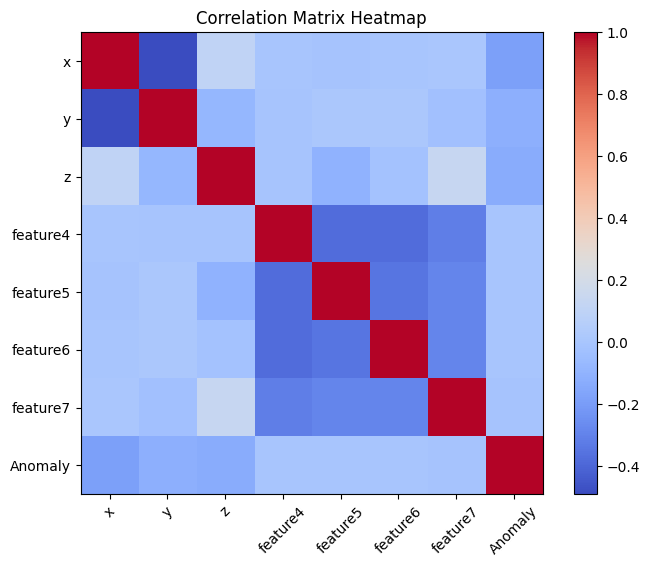

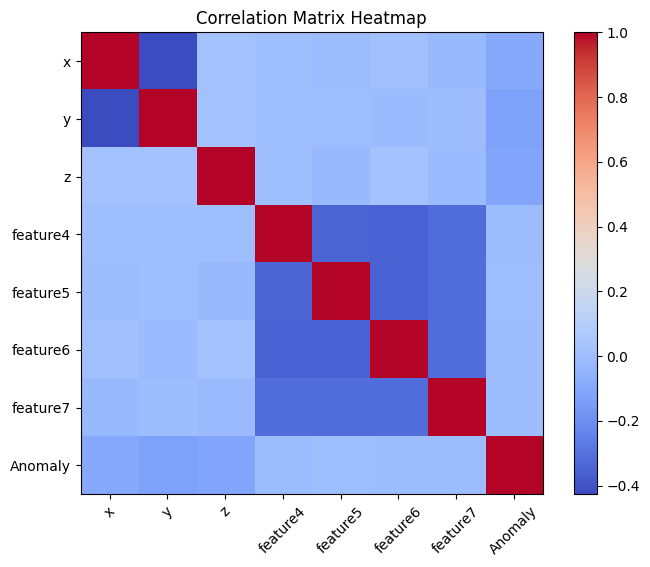

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import numpy as np

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=train_df.columns, outputCol=vector_col)
df_vector = assembler.transform(test_df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

m = matrix.collect()[0]["pearson({})".format(vector_col)].values

# Reshape the correlation matrix to a 2D square matrix
corr_matrix = m.reshape((8, 8))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.xticks(np.arange(len(corr_matrix)), labels=['x', 'y', 'z', 'feature4', 'feature5',
                                                'feature6', 'feature7', 'Anomaly'], rotation=45)
plt.yticks(np.arange(len(corr_matrix)), labels=['x', 'y', 'z', 'feature4', 'feature5',
                                                'feature6', 'feature7', 'Anomaly'])
plt.show()


# convert to vector column first
vector_col2 = "corr_features"
assembler2 = VectorAssembler(inputCols=train_df.columns, outputCol=vector_col2)
df_vector2 = assembler2.transform(train_df).select(vector_col2)

# get correlation matrix
matrix2 = Correlation.corr(df_vector2, vector_col2)

m2 = matrix2.collect()[0]["pearson({})".format(vector_col2)].values

# Reshape the correlation matrix to a 2D square matrix
corr_matrix2 = m2.reshape((8, 8))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix2, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix Heatmap")
plt.xticks(np.arange(len(corr_matrix2)), labels=['x', 'y', 'z', 'feature4', 'feature5',
                                                'feature6', 'feature7', 'Anomaly'], rotation=45)
plt.yticks(np.arange(len(corr_matrix2)), labels=['x', 'y', 'z', 'feature4', 'feature5',
                                                'feature6', 'feature7', 'Anomaly'])
plt.show()

Blue: Negative

Red: Positive

The stronger the color, the larger the correlation magnitude


---

1. Where do your eyes jump first when you look at the chart?

> Aside from the diagonal, the negative correlation around the sensor activity features (features 4 to 7).

2. What’s the strongest and what’s the weakest correlated pair (except the main diagonal and sensor position)?

> Strongest: Between x and y

>Weakest: Between z and feature 7

3. What are the three variables most correlated with anamoly?

> x, y, z (position of the sensor)

*Questions taken from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec*


---
Notes:
> No indication of strong linear relationships between features

> Weak negative correlations only

## Graph of Sensor Activity at the Sensor's Position
> **Red** Hues are Anomalous Event of Falling

> **Blue** Hues are Normal Living Events

>> Each color is representaive of a different sensor activity


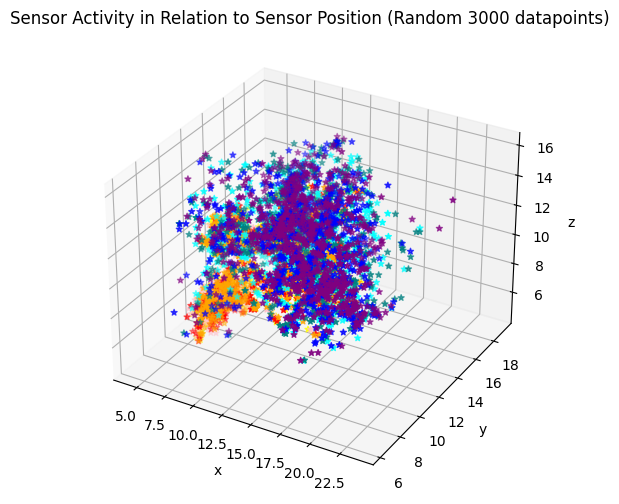

In [ ]:
import random
# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = train_df.toPandas()

# Create a scatter plot with 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

rs = random.Random()
rsn = rs.randint(0, 100)
a = pandas_df[pandas_df['anomaly'] == 1.0].sample(n=3000, random_state=rsn)
na = pandas_df[pandas_df['anomaly'] == 0.0].sample(n=3000, random_state=rsn)

# Scatter the activities
activities = ['010-000-024-033', '010-000-030-096', '020-000-032-221', '020-000-033-111']
colors = ['red', 'pink', 'orange', 'yellow']
colors2 = ['blue', 'teal', 'purple', 'cyan']

for i, activity in enumerate(activities):
    ax.scatter(a[a[activity] == 1.0]['x'], a[a[activity] == 1.0]['y'], a[a[activity] == 1.0]['z'], c=colors[i], marker='*', label=activity)
for i, activity in enumerate(activities):
    ax.scatter(na[na[activity] == 1.0]['x'], na[na[activity] == 1.0]['y'], na[na[activity] == 1.0]['z'], c=colors2[i], marker='*', label=activity)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Sensor Activity in Relation to Sensor Position (Random 3000 datapoints)')

# Scatter plot with color based on target variable
plt.show()





### Interative Graph

In [ ]:
import plotly.graph_objects as go

# Create a scatter plot using Plotly
fig = go.Figure()

# Scatter the activities
activities = ['010-000-024-033', '010-000-030-096', '020-000-032-221', '020-000-033-111']
colors = ['red', 'pink', 'orange', 'yellow']
colors2 = ['blue', 'teal', 'purple', 'cyan']

for i, activity in enumerate(activities):
    fig.add_trace(go.Scatter3d(
        x=a[a[activity] == 1.0]['x'],
        y=a[a[activity] == 1.0]['y'],
        z=a[a[activity] == 1.0]['z'],
        mode='markers',
        marker=dict(color=colors[i], size=4),
        name=activity
    ))

for i, activity in enumerate(activities):
    fig.add_trace(go.Scatter3d(
        x=na[na[activity] == 1.0]['x'],
        y=na[na[activity] == 1.0]['y'],
        z=na[na[activity] == 1.0]['z'],
        mode='markers',
        marker=dict(color=colors2[i], size=4),
        name=activity
    ))

# Set the layout and axis labels
fig.update_layout(
    title='Sensor Activity in Relation to Sensor Position (first 2000 datapoints)',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

# Show the interactive plot
fig.show()


## Data Descriptions and Notes

#### Anomalous Data

In [ ]:
pandas_df[pandas_df['anomaly'] == 1.0].describe()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
count,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.000000,6573.0
mean,11.546200,10.624721,10.373236,0.246159,0.272174,0.256960,0.224707,1.0
std,3.949997,1.437219,2.519433,0.430805,0.445113,0.436991,0.417421,0.0
min,5.271883,6.399819,4.600291,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.697414,9.714149,8.438281,0.000000,0.000000,0.000000,0.000000,1.0
50%,11.467071,10.614089,10.774882,0.000000,0.000000,0.000000,0.000000,1.0
75%,15.343153,11.658591,12.149046,0.000000,1.000000,1.000000,0.000000,1.0
max,19.333549,15.993734,15.912552,1.000000,1.000000,1.000000,1.000000,1.0


Notes:

1. The *position features* (x, y, z) show a range of values with relatively **small standard deviations**. This suggests that the sensor positions have relatively consistent patterns or distributions within the observed range.

2. By examining the mean values of the *activity features*, we can identify the activities that occur most frequently.
Looking at the mean values, we can see that **each activity feature has a different frequency of occurrence**. This implies that the activities are not equally distributed in the dataset.  

>> *010-000-030-096 being the most occurring and 020-000-033-111 being the least for anomaly detection.*



#### Normal Data

In [ ]:
pandas_df[pandas_df['anomaly'] == 0.0].describe()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
count,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000,127656.000000,127656.0
mean,13.274127,12.264672,11.435474,0.259189,0.257230,0.261171,0.222410,0.0
std,3.844819,2.730960,1.975517,0.438191,0.437109,0.439274,0.415867,0.0
min,4.077736,6.042775,5.026213,0.000000,0.000000,0.000000,0.000000,0.0
25%,9.789327,10.197622,10.015763,0.000000,0.000000,0.000000,0.000000,0.0
50%,13.767959,11.726128,11.387705,0.000000,0.000000,0.000000,0.000000,0.0
75%,16.403957,14.452007,12.973125,1.000000,1.000000,1.000000,0.000000,0.0
max,24.360715,19.633268,16.296521,1.000000,1.000000,1.000000,1.000000,0.0


Notes:

1. The mean values for the **positional features** indicate the average position in each dimension (x, y, z) for the normal instances. These values provide a sense of the central tendency or the typical position in the dataset.
>> It is worth noting that the mean is higher in the normal data than the mean of the anomalous data.

2. Higher mean values suggest a higher frequency of occurrence for that specific activity.We see that the **first** and the the **third** sensor activity data are **higher** than our anomalous data.

> This could imply that the presence of certain activities, or the absence of others, may have a discriminative power in distinguishing between normal and anomalous instances.



### Coefficient of Variation

In relations to the data, a higher number for CV would indicate that there is a larger variability in the positioning of the sensor (bigger dispertion)

In [ ]:
#coefficient of variation (CV) for each dimension,  measure of dispersion of a probability distribution
def cv(l):
  cv1 = (l[2] / l[0]) * 100
  cv2 = (l[3] / l[1]) * 100
  return (cv1, cv2)
x = [pandas_df[pandas_df['anomaly'] == 0.0]['x'].mean(),
    pandas_df[pandas_df['anomaly'] == 1.0]['x'].mean(),
     pandas_df[pandas_df['anomaly'] == 0.0]['x'].std(),
     pandas_df[pandas_df['anomaly'] == 1.0]['x'].std()]

y = [pandas_df[pandas_df['anomaly'] == 0.0]['y'].mean(),
    pandas_df[pandas_df['anomaly'] == 1.0]['y'].mean(),
     pandas_df[pandas_df['anomaly'] == 0.0]['y'].std(),
     pandas_df[pandas_df['anomaly'] == 1.0]['y'].std()]

z = [pandas_df[pandas_df['anomaly'] == 0.0]['z'].mean(),
    pandas_df[pandas_df['anomaly'] == 1.0]['z'].mean(),
     pandas_df[pandas_df['anomaly'] == 0.0]['z'].std(),
     pandas_df[pandas_df['anomaly'] == 1.0]['z'].std()]

x1, x2 = cv(x)
y1, y2 = cv(y)
z1, z2 = cv(z)
print("Normal Data \n x: ", x1, "\n y:", y1, "\n z: ", z1,
      "\n Anomalous Data \n x: ", x2, "\n y: ", y2, "\n z:", z2)

Normal Data 
 x:  28.964760575694925 
 y: 22.266881110288086 
 z:  17.2753430903239 
 Anomalous Data 
 x:  34.21036394731342 
 y:  13.527121348948432 
 z: 24.287819038423404


#### Box and Whisker Plot and Violin Plot of Positional Data

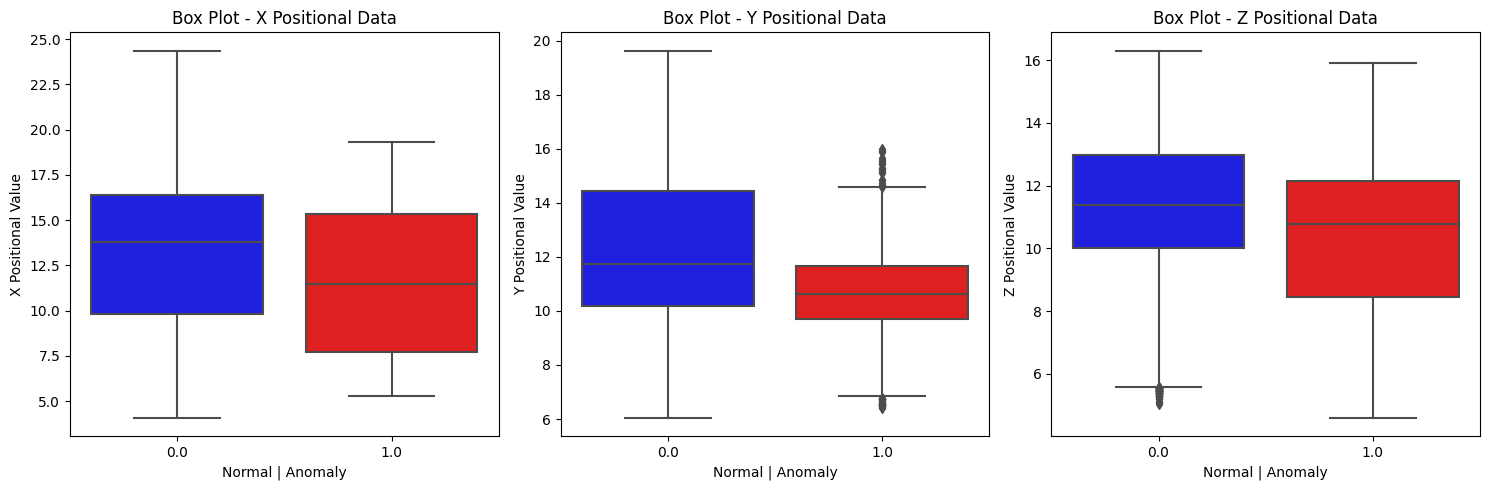

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data for anomalous and normal data
anomalous_data = pandas_df[pandas_df['anomaly'] == 1.0]
normal_data = pandas_df[pandas_df['anomaly'] == 0.0]

# Subset the positional data for anomalous and normal data
anomalous_pos_data = anomalous_data[['x', 'y', 'z']]
normal_pos_data = normal_data[['x', 'y', 'z']]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plots for each position
for i, pos in enumerate(['x', 'y', 'z']):
    sns.boxplot(x='anomaly', y=pos, palette=['blue', 'red'], data=pandas_df, ax=axes[i])
    axes[i].set_title(f'Box Plot - {pos.capitalize()} Positional Data')
    axes[i].set_xlabel('Normal | Anomaly')
    axes[i].set_ylabel(f'{pos.capitalize()} Positional Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Notes:

The range in the anomalous data for all positional features (x, y, z) is generally smaller compared to the normal data.
>  This indicates that during anomalous events, the positions of the sensor have less variability or spread compared to normal events.

Overall, the quartiles between normal and anomalous data differ to some extent, indicating differences in the distribution and central tendency of positions during normal and anomalous events.

IQR: measure of the spread or variability of the positional values

>For the x-position, the IQR is larger in the normal data compared to the anomalous data, indicating a wider spread of x-positions during normal events.

> The larger IQR in the anomalous data for y and z positions suggests that these dimensions exhibit more variation or dispersion during anomalous events compared to the normal data.

Median:
The differences in medians between normal and anomalous data suggest that there are distinct average values or central tendencies in the positional data during normal and anomalous events.

#### Sensor Data Plot

A plot of the coefficient variation for the four sensor actvities

In [ ]:
#coefficient of variation (CV) for each dimension,  measure of dispersion of a probability distribution
def cv(l):
  cv1 = (l[2] / l[0]) * 100
  cv2 = (l[3] / l[1]) * 100
  return (cv1, cv2)

sd1 = [pandas_df[pandas_df['anomaly'] == 0.0]['010-000-024-033'].mean(),
       pandas_df[pandas_df['anomaly'] == 1.0]['010-000-024-033'].mean(),
       pandas_df[pandas_df['anomaly'] == 0.0]['010-000-024-033'].std(),
       pandas_df[pandas_df['anomaly'] == 1.0]['010-000-024-033'].std()]

sd2 = [pandas_df[pandas_df['anomaly'] == 0.0]['010-000-030-096'].mean(),
       pandas_df[pandas_df['anomaly'] == 1.0]['010-000-030-096'].mean(),
       pandas_df[pandas_df['anomaly'] == 0.0]['010-000-030-096'].std(),
       pandas_df[pandas_df['anomaly'] == 1.0]['010-000-030-096'].std()]

sd3 = [pandas_df[pandas_df['anomaly'] == 0.0]['020-000-032-221'].mean(),
       pandas_df[pandas_df['anomaly'] == 1.0]['020-000-032-221'].mean(),
       pandas_df[pandas_df['anomaly'] == 0.0]['020-000-032-221'].std(),
       pandas_df[pandas_df['anomaly'] == 1.0]['020-000-032-221'].std()]

sd4 = [pandas_df[pandas_df['anomaly'] == 0.0]['020-000-033-111'].mean(),
       pandas_df[pandas_df['anomaly'] == 1.0]['020-000-033-111'].mean(),
       pandas_df[pandas_df['anomaly'] == 0.0]['020-000-033-111'].std(),
       pandas_df[pandas_df['anomaly'] == 1.0]['020-000-033-111'].std()]


x1, x2 = cv(sd1)
y1, y2 = cv(sd2)
z1, z2 = cv(sd3)
k1, k2 = cv(sd4)

print("Normal Data \n sd1: ", x1, "\n sd2:", y1, "\n sd3: ", z1, "\n sd4: ", k1,
      "\n Anomalous Data \n sd1: ", x2, "\n sd2: ", y2, "\n sd3:", z2, "\n sd4: ", k2,)

Normal Data 
 sd1:  169.06254550144288 
 sd2: 169.92905801145824 
 sd3:  168.19442255255353 
 sd4:  186.98191087459946 
 Anomalous Data 
 sd1:  175.01110606075525 
 sd2:  163.539796861915 
 sd3: 170.0615141861274 
 sd4:  185.76226627691298


Notes:

The coefficient of variation for the first three sensor detection are around the same amount for the **Normal Data**, indicating the same amount of detection.

The CVs of the **Anomalous Data** have higher variability, suggesting detection was not as similar amongt the sensors.

Lastly, the last sensor's CVs are the about the same for **both Normal and Anomalous** data. This may mean the amount of detection from this sensor was similar in both events (falling or normal behavior).

#### Comparing the two

1. **Range**: Comparing the min and max values of the positional data in both the anomalous and normal datasets, it appears that the range of positions is broader in the normal data. The normal data has higher maximum values and, in some cases, higher minimum values compared to the anomalous data. This suggests that the normal instances have a wider coverage of positions, potentially indicating more extensive spatial variations and a broader range of possible positions.

2. **Dispersion**: The CV values indicate that the data points in the anomalous dataset have higher dispersion compared to the normal dataset for the **x and z dimension**. The higher dispersion suggests that the positional data in the anomalous observations exhibit greater variability within each dimension.
>> The larger CV values indicate potential outliers or anomalous patterns in the positional data, reflecting a departure from the expected behavior observed in the normal dataset.

>However, the **y dimension** shows a much lower cv in the anomalous data than the normal, indicating the variability is less in the anomalous cases.

3. Higher mean values of the **sensor activity features** suggest a higher frequency of occurrence for that specific activity.We see that the **first and the the third sensor activity data in the normal events** are higher than our anomalous data.

>>This could imply that the presence of certain activities, or the absence of others, may have a discriminative power in distinguishing between normal and anomalous instances.

4. Overall, based on the provided data, the positional features in the normal and anomalous datasets exhibit noticeable differences in terms of mean values, dispersion, and range. These distinctions can potentially be indicative of the spatial characteristics associated with normal and anomalous instances. We can also see sensor activity being present or not may affect our anomalous outcomes (refer to point3).

# Models & Iterative Data Engineering

### Random Forest Classifier

![alternatvie text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)


In [11]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the features column name
features_col = ['x', 'y', 'z', '010-000-024-033', '010-000-030-096', '020-000-032-221', '020-000-033-111']

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")

# Create a RandomForestClassifier model
rf = RandomForestClassifier(labelCol="anomaly", featuresCol="features")

# Create a Pipeline with the VectorAssembler and RandomForestClassifier
pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Evaluate the model using a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC: {:.4f}".format(auc))

# Get the feature importances from the trained model
importances = model.stages[-1].featureImportances
print("Feature Importances:")
for idx, feature in enumerate(features_col):
    print("{}: {:.4f}".format(feature, importances[idx]))


AUC: 0.7886
Feature Importances:
x: 0.3889
y: 0.1497
z: 0.4604
010-000-024-033: 0.0001
010-000-030-096: 0.0002
020-000-032-221: 0.0008
020-000-033-111: 0.0000


> Feature importance indicates mostly positional data impacts

In [12]:
predictions_df = predictions.select("anomaly", "probability").toPandas()
predictions_df.head()

,anomaly,probability
0,0.0,"[0.9189342767437433, 0.08106572325625673]"
1,0.0,"[0.9189342767437433, 0.08106572325625673]"
2,0.0,"[0.9189342767437433, 0.08106572325625673]"
3,0.0,"[0.9189342767437433, 0.08106572325625673]"
4,0.0,"[0.9189342767437433, 0.08106572325625673]"


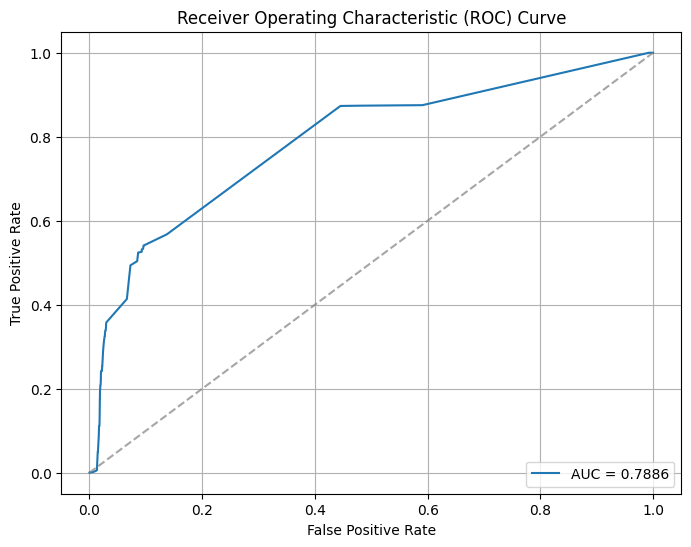

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Extract the true anomalies and predicted probabilities
y_true = predictions_df["anomaly"]
y_prob = predictions_df["probability"].apply(lambda x: x[1])

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(auc_score))
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


> Minimize the False Positive Rate (Precision)

In [14]:
import numpy as np
from sklearn.metrics import precision_score

thresholds = {}
for t in np.linspace(0, 1, num=100):
  pred = y_prob.apply(lambda x: 1 if x >= t else 0)
  precision = precision_score(y_true, pred, zero_division=1)
  thresholds[t] = precision

max(thresholds.items(), key=lambda x: x[1] if x[1] != 1 else -np.inf)

(0.14141414141414144, 0.40771558245083206)

#### Playing around with Hyper Parameters

In [23]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import optuna

# Define the objective function for Optuna optimization
def objective(trial):
    # Define the hyperparameters to be tuned
    num_trees = trial.suggest_int('num_trees', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    # Create a RandomForestClassifier model with the suggested hyperparameters
    rf = RandomForestClassifier(
        labelCol="anomaly",
        featuresCol="features",
        numTrees=num_trees,
        maxDepth=max_depth
    )

    # Create a Pipeline with the VectorAssembler and RandomForestClassifier
    pipeline = Pipeline(stages=[assembler, rf])

    # Fit the pipeline on the training data
    model = pipeline.fit(train_df)

    # Make predictions on the test data
    predictions = model.transform(test_df)

    # Evaluate the model using a BinaryClassificationEvaluator
    evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
    auc = evaluator.evaluate(predictions)

    return auc

# Define the features column name
features_col = ['x', 'y', 'z', '010-000-024-033', '010-000-030-096', '020-000-032-221', '020-000-033-111']

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")

# Define the study for Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create a RandomForestClassifier model with the best hyperparameters
rf = RandomForestClassifier(
    labelCol="anomaly",
    featuresCol="features",
    numTrees=best_params['num_trees'],
    maxDepth=best_params['max_depth']
)

# Create a Pipeline with the VectorAssembler and RandomForestClassifier
pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Evaluate the model using a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC: {:.4f}".format(auc))

# Get the feature importances from the trained model
importances = model.stages[-1].featureImportances
print("Feature Importances:")
for idx, feature in enumerate(features_col):
    print("{}: {:.4f}".format(feature, importances[idx]))




```
[I 2023-07-15 14:38:32,296] Trial 25 finished with value: 0.8085247354456883 and parameters: {'num_trees': 185, 'max_depth': 5}. Best is trial 25 with value: 0.8085247354456883.
```



In [16]:
rf_best = RandomForestClassifier(labelCol="anomaly", featuresCol="features", numTrees=185, maxDepth=5)
pipeline_best = Pipeline(stages=[assembler, rf_best])
model_best = pipeline_best.fit(train_df)
predictions_best = model_best.transform(test_df)
auc_best = evaluator.evaluate(predictions_best)
print("Best AUC: {:.4f}".format(auc_best))


Best AUC: 0.7953


In [19]:
import numpy as np
from sklearn.metrics import precision_score

pred_df = predictions_best.select("anomaly", "probability").toPandas()

y_prob2 = pred_df["probability"].apply(lambda x: x[1])
y_true2 = pred_df["anomaly"]

thresholds = {}
for t in np.linspace(0, 1, num=100):
  pred = y_prob2.apply(lambda x: 1 if x >= t else 0)
  precision = precision_score(y_true2, pred, zero_division=1)
  thresholds[t] = precision

max(thresholds.items(), key=lambda x: x[1] if x[1] != 1 else -np.inf)

(0.11111111111111112, 0.4111791730474732)

Thoughts:

From the most simplest Random Forest Model, the precision score is very low, both with default hyper params and "optimal" hyperparams.

I will implement the following techniques to help:

1. Feature Selection

> **Dimensionality Reduction**: Principal Component Analysis (PCA) or t-SNE to create new features that capture the most important information from the original features. Help reduce the complexity of the data while preserving relevant information.



```
AUC: 0.7886
Feature Importances:
x: 0.3889
y: 0.1497
z: 0.4604
010-000-024-033: 0.0001
010-000-030-096: 0.0002
020-000-032-221: 0.0008
020-000-033-111: 0.0000
```
Using the best tested hyperparams


```
{'num_trees': 185, 'max_depth': 5}
```




3. Oversampling

> Synthetic Minority Over-sampling Technique




## Feature Selection & SMOT

##### Feature Selection
> Based on Feature Important Results

In [20]:
# Define the columns to be dropped
columns_to_drop = ['010-000-024-033', '010-000-030-096', '020-000-032-221', '020-000-033-111']

# Drop the specified columns from the DataFrame
new_train = train_df.drop(*columns_to_drop)
new_test = test_df.drop(*columns_to_drop)

In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define the features column name
features_col = ['x', 'y', 'z']

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")

# Create a RandomForestClassifier model
rf = RandomForestClassifier(labelCol="anomaly", featuresCol="features", numTrees= 185, maxDepth = 5)

# Create a Pipeline with the VectorAssembler and RandomForestClassifier
pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(new_train)

# Make predictions on the test data
predictions = model.transform(new_test)

# Evaluate the model using a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC: {:.4f}".format(auc))

# Get the feature importances from the trained model
importances = model.stages[-1].featureImportances
print("Feature Importances:")
for idx, feature in enumerate(features_col):
    print("{}: {:.4f}".format(feature, importances[idx]))


AUC: 0.7856
Feature Importances:
x: 0.3955
y: 0.1234
z: 0.4812


In [22]:
import numpy as np
from sklearn.metrics import precision_score

pred_df = predictions.select("anomaly", "probability").toPandas()

y_prob2 = pred_df["probability"].apply(lambda x: x[1])
y_true2 = pred_df["anomaly"]

thresholds = {}
for t in np.linspace(0, 1, num=100):
  pred = y_prob2.apply(lambda x: 1 if x >= t else 0)
  precision = precision_score(y_true2, pred, zero_division=1)
  thresholds[t] = precision

max(thresholds.items(), key=lambda x: x[1] if x[1] != 1 else -np.inf)

(0.31313131313131315, 0.42444444444444446)

##### SMOTE

In [33]:
import pandas as pd
frames = [new_train.toPandas(), new_test.toPandas()]
whole_frame = pd.concat(frames)
X = whole_frame.iloc[:, :-1]
y = whole_frame.iloc[:, -1:]

X.head()

,x,y,z
0,18.495860,13.766527,14.362624
1,18.501072,13.827225,14.270268
2,18.405950,13.868976,14.094804
3,18.444572,13.910701,14.116078
4,18.418470,13.933917,14.320566


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from pyspark.sql.functions import monotonically_increasing_id

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_spark = spark.createDataFrame(X_train)
X_test_spark = spark.createDataFrame(X_test)
y_train_spark = spark.createDataFrame(y_train)
y_test_spark = spark.createDataFrame(y_test)

# Add a unique identifier column to X_train_spark and y_train_spark
X_train_spark = X_train_spark.withColumn("id", monotonically_increasing_id())
y_train_spark = y_train_spark.withColumn("id", monotonically_increasing_id())
X_test_spark = X_test_spark.withColumn("id", monotonically_increasing_id())
y_test_spark = y_test_spark.withColumn("id", monotonically_increasing_id())

# Join the DataFrames using the id column
train_df = X_train_spark.join(y_train_spark, on="id").drop("id")
test_df = X_test_spark.join(y_test_spark, on="id").drop("id")

test_df.show(5)

+------------------+------------------+------------------+-------+
|                 x|                 y|                 z|anomaly|
+------------------+------------------+------------------+-------+
|11.337695996936352|12.457477809422809|  9.33079382944869|    0.0|
| 15.84276987888171|10.939267537809645|10.092724928897349|    0.0|
|17.237224463445884|12.279229713621456|   8.8204019250876|    0.0|
|  6.89179322123231|12.280626805434528| 5.924382705115694|    1.0|
| 6.403617699610419|12.426370340962713| 12.70497391034364|    1.0|
+------------------+------------------+------------------+-------+
only showing top 5 rows



In [ ]:
import optuna
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Define the objective function for Optuna optimization
def objective(trial):
    # Define the hyperparameters to be tuned
    num_trees = trial.suggest_int('num_trees', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)

    # Create a RandomForestClassifier model with the suggested hyperparameters
    rf = RandomForestClassifier(
        labelCol="anomaly",
        featuresCol="features",
        numTrees=num_trees,
        maxDepth=max_depth
    )

    # Create a Pipeline with the VectorAssembler and RandomForestClassifier
    pipeline = Pipeline(stages=[assembler, rf])

    # Fit the pipeline on the training data
    model = pipeline.fit(train_df)

    # Make predictions on the test data
    predictions = model.transform(test_df)

    # Evaluate the model using a BinaryClassificationEvaluator
    evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
    auc = evaluator.evaluate(predictions)

    return auc

# Define the features column name
features_col = ['x', 'y', 'z']

# Create a VectorAssembler to combine the features into a single vector column
assembler = VectorAssembler(inputCols=features_col, outputCol="features")

# Define the study for Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters from the study
best_params = study.best_params

# Create a RandomForestClassifier model with the best hyperparameters
rf = RandomForestClassifier(
    labelCol="anomaly",
    featuresCol="features",
    numTrees=best_params['num_trees'],
    maxDepth=best_params['max_depth']
)

# Create a Pipeline with the VectorAssembler and RandomForestClassifier
pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Evaluate the model using a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC: {:.4f}".format(auc))

# Get the feature importances from the trained model
importances = model.stages[-1].featureImportances
print("Feature Importances:")
for idx, feature in enumerate(features_col):
    print("{}: {:.4f}".format(feature, importances[idx]))




```
[I 2023-07-26 14:37:59,480] Trial 24 finished with value: 0.92938197436933 and parameters: {'num_trees': 110, 'max_depth': 10}. Best is trial 24 with value: 0.92938197436933.

```



> num_tree : 110

> max_depth : 10

In [49]:
rf = RandomForestClassifier(
    labelCol="anomaly",
    featuresCol="features",
    numTrees=110,
    maxDepth=10
)

pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline on the training data
model = pipeline.fit(train_df)

# Make predictions on the test data
predictions = model.transform(test_df)

# Evaluate the model using a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="anomaly")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC: {:.4f}".format(auc))


AUC: 0.9294


In [50]:
import numpy as np
from sklearn.metrics import precision_score

pred_df = predictions.select("anomaly", "probability").toPandas()

y_prob2 = pred_df["probability"].apply(lambda x: x[1])
y_true2 = pred_df["anomaly"]

thresholds = {}
for t in np.linspace(0, 1, num=100):
  pred = y_prob2.apply(lambda x: 1 if x >= t else 0)
  precision = precision_score(y_true2, pred, zero_division=1)
  thresholds[t] = precision

max(thresholds.items(), key=lambda x: x[1] if x[1] != 1 else -np.inf)

(0.9595959595959597, 0.9861607142857143)

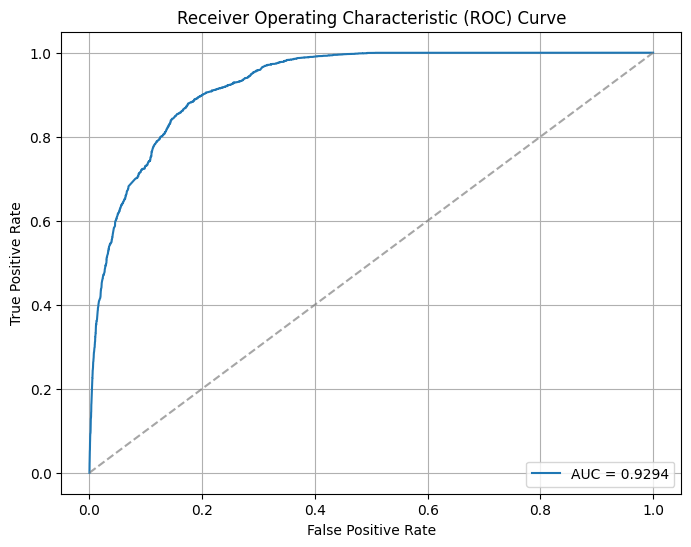

In [55]:
from sklearn.metrics import roc_curve, auc

# Extract the true anomalies and predicted probabilities
y_true = pred_df["anomaly"]
y_prob = pred_df["probability"].apply(lambda x: x[1])

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = {:.4f}".format(auc_score))
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# For Future Projects

4. **Integration with Full-Stack Management Solution:**
   - Design and implement a full-stack management system that includes asset management, configuration management, and observability components.
   - Integrate the anomaly detection system with the overall solution architecture, ensuring seamless data flow and synchronization.
   - Implement full-stack asset management, configuration management, and observability solutions, including AIOps capabilities, to provide end-to-end visibility into the IT infrastructure.
   - Integrate the developed anomaly detection system with existing IT operations management tools and workflows.

5. **CI/CD and MLOps Implementation:**
   - Set up a CI/CD pipeline for continuous integration and deployment of the anomaly detection solution.
   - Incorporate MLOps principles to manage the machine learning lifecycle, including version control, automated testing, and reproducibility.

6. **Dockerization and Deployment:**
   - Containerize the anomaly detection solution using Docker for easy deployment and scalability.
   - Deploy the solution in a production environment, ensuring proper monitoring and error handling mechanisms.

7. **Evaluation and Reporting:**
   - Evaluate the performance of the anomaly detection system, considering metrics such as accuracy, precision, recall, and F1-score.
   - Generate visualizations, dashboards, or reports to present the detected anomalies, their severity, and potential impacts on IT operations.
   - Incorporate observability solutions to provide real-time monitoring, event management, and incident resolution capabilities.
   - Assess the models' ability to detect and classify different types of anomalies specific to IT operations management, such as performance anomalies, security breaches, or configuration issues.
   - Generate actionable insights and recommendations for IT operations teams based on the detected anomalies.

8. **Documentation and Presentation:**
   - Document the project's methodology, including data preprocessing techniques, feature engineering approaches, and model selection rationale.
   - Highlight the incorporation of anomaly detection techniques, AIOps capabilities, big data technologies, CI/CD, MLOps, and Docker in the project.
   - Prepare a comprehensive presentation that showcases the project's objectives, methodology, key findings, and the value it brings to IT operations management and cybersecurity domains.
